In [29]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
from junifer.storage import HDF5FeatureStorage
from julearn.api import run_cross_validation
from julearn.pipeline import PipelineCreator
from julearn.viz import plot_scores
from julearn.stats.corrected_ttest import corrected_ttest
import pandas as pd
import seaborn as sns
from sklearn.svm import LinearSVC
import warnings
from sklearn.metrics import mean_absolute_error
import numpy as np
from scipy.stats import pearsonr

In [4]:
df_demographics = pd.read_csv('/home/hsreekri/Julearn_predictions/data/IXI_demograpic_data.csv',sep=',')
df_demographics.rename(columns={"IXI_ID": "subject"}, inplace=True)
df_demographics['subject'] = df_demographics['subject'].apply(lambda x: f'sub-IXI{x}')
storage = HDF5FeatureStorage(uri='/home/hsreekri/Julearn_predictions/data/IXI_Histograms_Parcels.hdf5')
df_parcellations = storage.read_df('VBM_GM_Schaefer100x17_mean_aggregation')
df_hists = storage.read_df('VBM_GM_Histogram_100bins_IXI_hist')

In [6]:
df_hists.columns = df_hists.columns.astype(str)
X_hists = list(df_hists.columns)
X_hists = X_hists[1:100]
df_full_histograms = df_hists.merge(df_demographics, on="subject")
df_full_histograms = df_full_histograms.dropna()

In [7]:
df_full_histograms

,subject,0,1,2,3,4,5,6,7,8,...,HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,STUDY_DATE,AGE
0,sub-IXI184,137400.0,23636.0,22546.0,16964.0,16057.0,17960.0,14767.0,14600.0,16786.0,...,184,86,1,2,1,5,1975-09-06,1,2005-10-19,30.12
1,sub-IXI441,91575.0,29741.0,24494.0,21839.0,20156.0,18948.0,18060.0,17535.0,17094.0,...,159,69,1,1,1,5,1958-04-18,1,2006-05-25,48.10
2,sub-IXI549,120035.0,23803.0,17155.0,17518.0,16414.0,13378.0,15129.0,13149.0,15193.0,...,162,54,1,1,1,5,1981-08-17,1,2006-08-24,25.02
3,sub-IXI549,120035.0,23803.0,17155.0,17518.0,16414.0,13378.0,15129.0,13149.0,15193.0,...,162,54,0,0,0,0,1981-08-17,1,2006-08-24,25.02
4,sub-IXI269,72829.0,29911.0,25893.0,24053.0,22435.0,24628.0,21342.0,21019.0,20817.0,...,178,63,1,1,1,5,1979-05-12,1,2005-12-09,26.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,sub-IXI306,75800.0,27464.0,22214.0,16567.0,18307.0,17172.0,13844.0,16071.0,15716.0,...,156,57,3,1,1,5,1975-12-03,1,2006-02-07,30.18
504,sub-IXI373,169408.0,24593.0,21214.0,19912.0,21557.0,19520.0,19927.0,20464.0,23799.0,...,165,69,3,2,2,2,1947-07-18,1,2006-05-03,58.79
505,sub-IXI492,168421.0,24073.0,23923.0,17683.0,19418.0,15507.0,14825.0,17358.0,14542.0,...,157,61,1,1,5,5,1937-04-27,1,2006-08-11,69.29
506,sub-IXI597,88649.0,27498.0,22980.0,23763.0,18316.0,17566.0,19887.0,16249.0,16332.0,...,149,52,1,1,1,2,1963-11-06,1,2006-12-04,43.08


In [8]:
df_parcellations.columns = df_parcellations.columns.astype(str)
X_parcels = list(df_parcellations.columns)
X_parcels = X_parcels[1:100]
df_full_parcellations = df_parcellations.merge(df_demographics, on="subject")
df_full_parcellations = df_full_parcellations.dropna()

In [9]:
creator = PipelineCreator(problem_type="regression")
creator.add("zscore")
creator.add(
    "ridge"
)

In [10]:
search_params = {
    "kind": "optuna",
    "cv":4
}

scoring = ["neg_mean_absolute_error","neg_mean_squared_error","neg_mean_absolute_percentage_error"]
scores_parcellations, model_parcellations, inspector_parcellations_ridge = run_cross_validation(
    X=X_parcels,
    y='AGE',
    data=df_full_parcellations,
    search_params=search_params,
    model=creator,
    return_train_score=True,
    return_inspector=True,
    cv=4,
    scoring = scoring,
)

/home/hsreekri/Hsreekri/lib/python3.11/site-packages/julearn/prepare.py:505: RuntimeWarning: The following columns are not defined in X_types: ['LH_VisCent_ExStr_2', 'LH_VisCent_Striate_1', 'LH_VisCent_ExStr_3', 'LH_VisPeri_ExStrInf_1', 'LH_VisPeri_StriCal_1', 'LH_VisPeri_ExStrSup_1', 'LH_SomMotA_1', 'LH_SomMotA_2', 'LH_SomMotB_Aud_1', 'LH_SomMotB_S2_1', 'LH_SomMotB_S2_2', 'LH_SomMotB_Cent_1', 'LH_DorsAttnA_TempOcc_1', 'LH_DorsAttnA_ParOcc_1', 'LH_DorsAttnA_SPL_1', 'LH_DorsAttnB_PostC_1', 'LH_DorsAttnB_PostC_2', 'LH_DorsAttnB_PostC_3', 'LH_DorsAttnB_FEF_1', 'LH_SalVentAttnA_ParOper_1', 'LH_SalVentAttnA_Ins_1', 'LH_SalVentAttnA_Ins_2', 'LH_SalVentAttnA_ParMed_1', 'LH_SalVentAttnA_FrMed_1', 'LH_SalVentAttnB_PFCl_1', 'LH_SalVentAttnB_PFCmp_1', 'LH_LimbicB_OFC_1', 'LH_LimbicA_TempPole_1', 'LH_LimbicA_TempPole_2', 'LH_ContA_IPS_1', 'LH_ContA_PFCl_1', 'LH_ContA_PFCl_2', 'LH_ContB_PFClv_1', 'LH_ContC_pCun_1', 'LH_ContC_pCun_2', 'LH_ContC_Cingp_1', 'LH_DefaultA_PFCd_1', 'LH_DefaultA_pCunPCC_1'

In [12]:
search_params = {
    "kind": "optuna",
    "cv":4
}

scoring = ["neg_mean_absolute_error","neg_mean_squared_error","neg_mean_absolute_percentage_error"]
scores_hists, model_hists, inspector_hists_ridge = run_cross_validation(
    X=X_hists,
    y='AGE',
    data=df_full_histograms,
    search_params=search_params,
    model=creator,
    return_train_score=True,
    return_inspector=True,
    cv=4,
    scoring = scoring,
)

/home/hsreekri/Hsreekri/lib/python3.11/site-packages/julearn/prepare.py:505: RuntimeWarning: The following columns are not defined in X_types: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']. They will be treated as continuous.
  warn_with_log(



In [13]:
print('MAE for Histograms (KRR)', abs(scores_hists["test_neg_mean_absolute_error"].mean()))
print(abs(scores_hists["test_neg_mean_absolute_percentage_error"].mean()))

MAE for Histograms (KRR) 9.83536948186042
0.21976599862602322


In [14]:
print('MAE for parcellations (KRR)', abs(scores_parcellations["test_neg_mean_absolute_error"].mean()))

MAE for parcellations (KRR) 8.468393129978816


In [15]:
fold_predictions_hists = inspector_hists_ridge.folds.predict()
fold_predictions_parcels = inspector_parcellations_ridge.folds.predict()

In [16]:
fold_predictions_hists['repeat0_p0']

0      43.812302
1      53.181541
2      29.710436
3      29.710436
4      33.300591
         ...    
500    25.072731
501    19.703856
502    72.913239
503    37.691109
504    44.429272
Name: repeat0_p0, Length: 505, dtype: float32

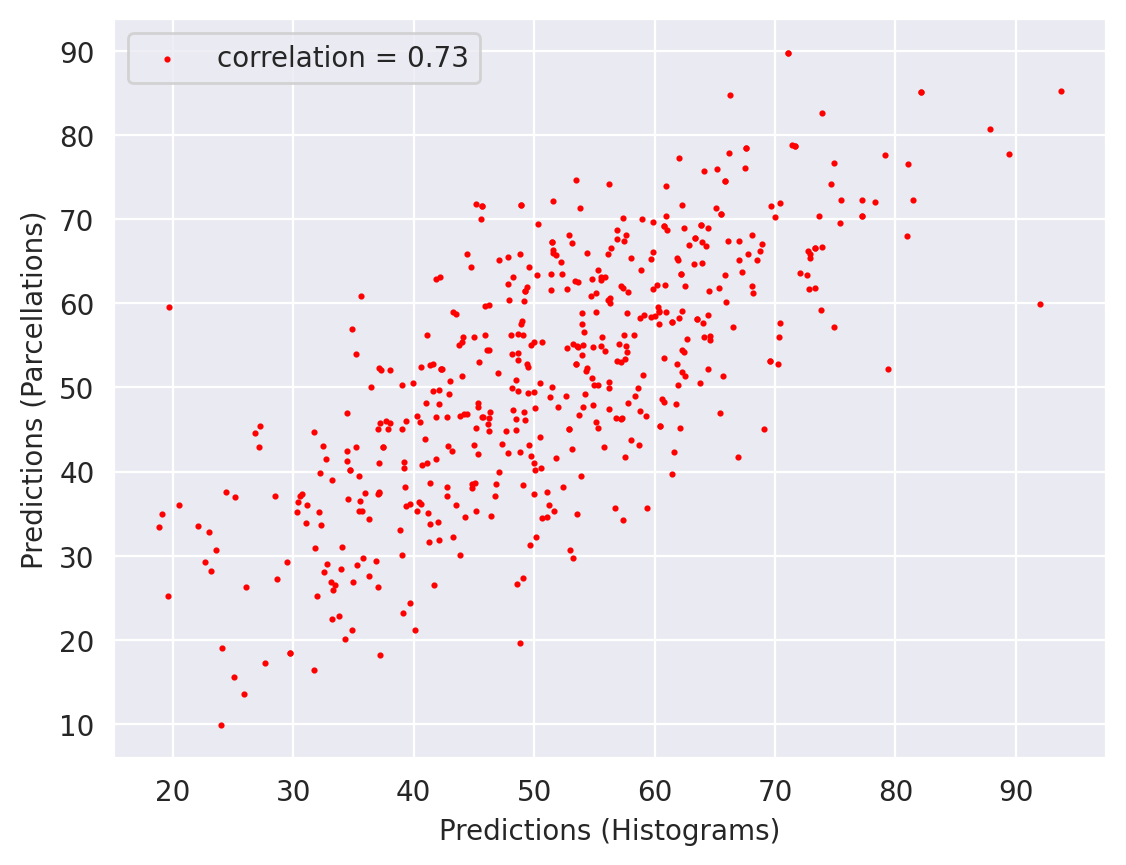

In [36]:
#With the outlier
corr = format(np.corrcoef(fold_predictions_hists['repeat0_p0'],fold_predictions_parcels['repeat0_p0'])[1, 0], ".2f")
plt.scatter(fold_predictions_hists['repeat0_p0'],fold_predictions_parcels['repeat0_p0'],s=1.5,color='r',label=f'correlation = {corr}')
plt.xlabel('Predictions (Histograms)')
plt.ylabel('Predictions (Parcellations)')
plt.legend()

In [22]:
def return_preds(*inspectors):
    n = len(inspectors)
    fig, axes = plt.subplots(1, n, figsize=(10 * n, 7))
    sns.set_style("darkgrid")
    
    if n == 1:
        axes = [axes]  
    
    for i, inspector in enumerate(inspectors):
        fold_predictions = inspector.folds.predict()
        y_true = fold_predictions['target']
        y_pred = fold_predictions['repeat0_p0']

        mae = format(mean_absolute_error(y_true, y_pred), ".2f")
        corr = format(np.corrcoef(y_pred, y_true)[1, 0], ".2f")
        
        ax = axes[i]
        ax.scatter(y_true, y_pred)
        ax.plot(y_true, y_true, color='red')
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()
        text = "MAE: " + str(mae) + "   CORR: " + str(corr)
        ax.set(xlabel="True values", ylabel="Predicted values")
        ax.set_title(f"Actual vs Predicted ({i + 1})")
        ax.text(
            xmax - 0.01 * xmax,
            ymax - 0.01 * ymax,
            text,
            verticalalignment="top",
            horizontalalignment="right",
            fontsize=12,
        )
        #ax.axis("scaled")
    
    plt.tight_layout()
    plt.show()


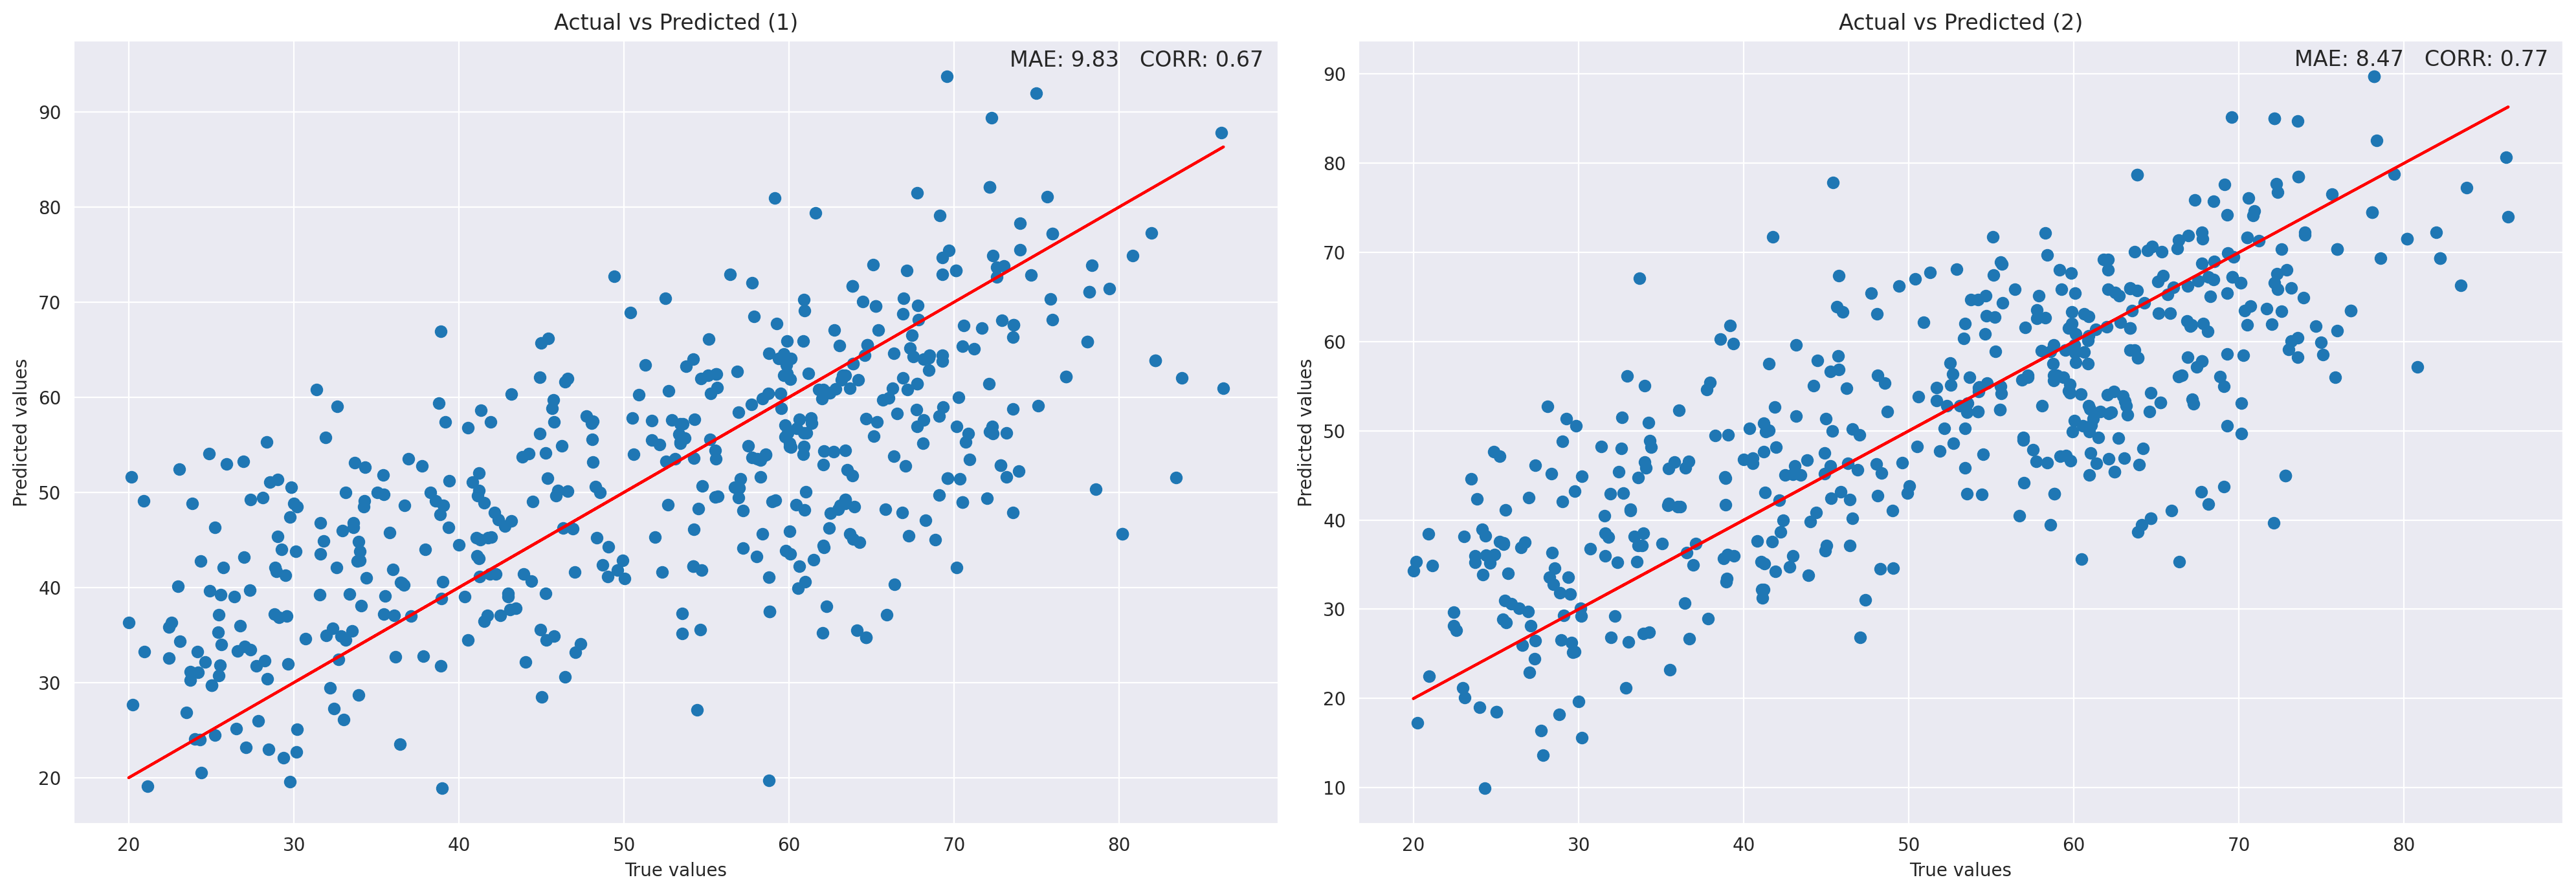

In [25]:
return_preds(inspector_hists_ridge,inspector_parcellations_ridge)